In [1]:
import wave
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def read_wave_file(filename):
    wave_read = wave.open(filename)
    str_data = wave_read.readframes(wave_read.getnframes())
    wave_read.close()
    return np.frombuffer(str_data, dtype=np.short)

In [3]:
def plot(data, title='', save_png = False):
    figure = plt.gcf()
    figure.set_size_inches(20, 8)
    plt.plot(data)
    plt.title(title)
    if save_png:
        plt.savefig('plots/'+ title + '.png')
    plt.show()

In [4]:
def mean_window(data, window = 8):
    new_size = int(data.size/window)
    result = np.zeros(new_size)
    for i in range (0, new_size):
        wsum = 0.0
        for j in range(0, window):
            wsum += abs(data[i*window+j])
        result[i] = wsum / window + 1.0 # for later log calculation
    return result

In [5]:
wave_full = read_wave_file('nan-ai-file-1.wav')

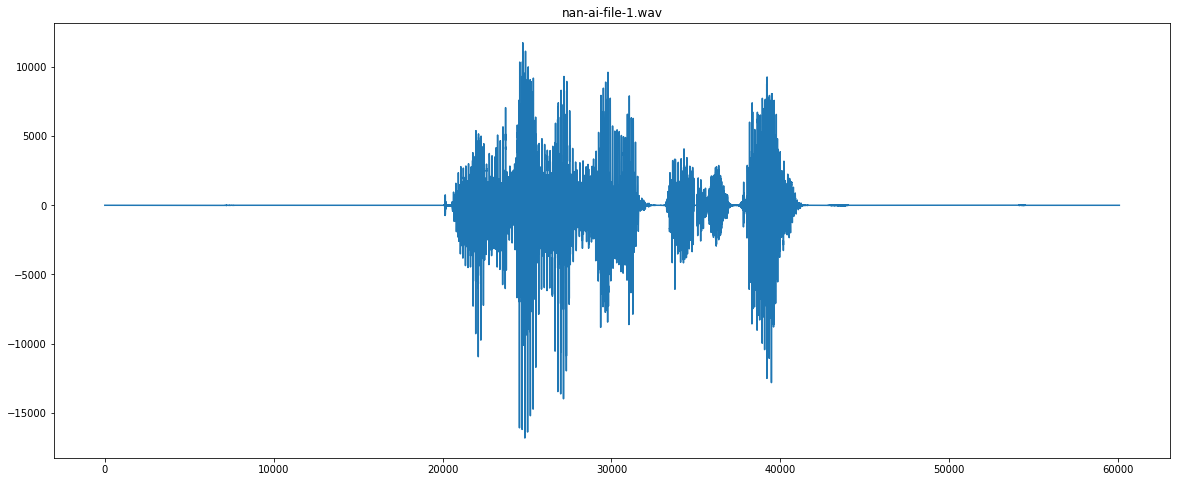

In [6]:
plot(wave_full, 'nan-ai-file-1.wav', save_png=True)

In [7]:
wave_mean = mean_window(wave_full)

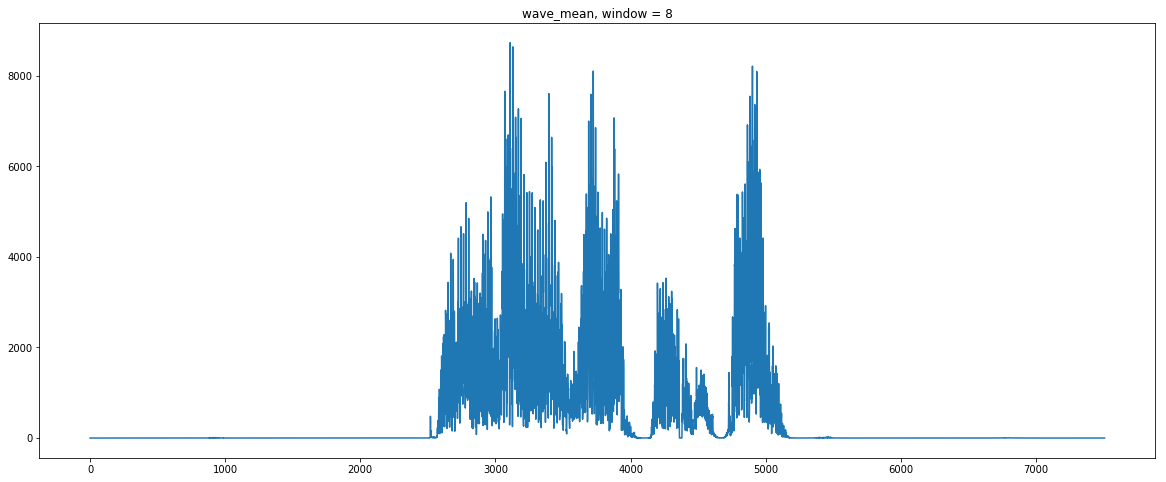

In [8]:
plot(wave_mean, 'wave_mean, window = 8')

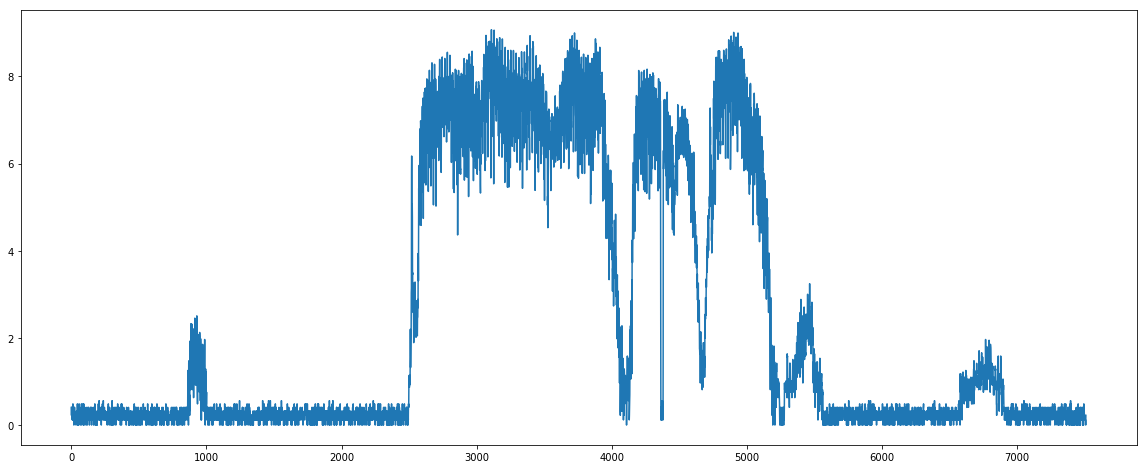

In [9]:
plot(np.log(wave_mean))

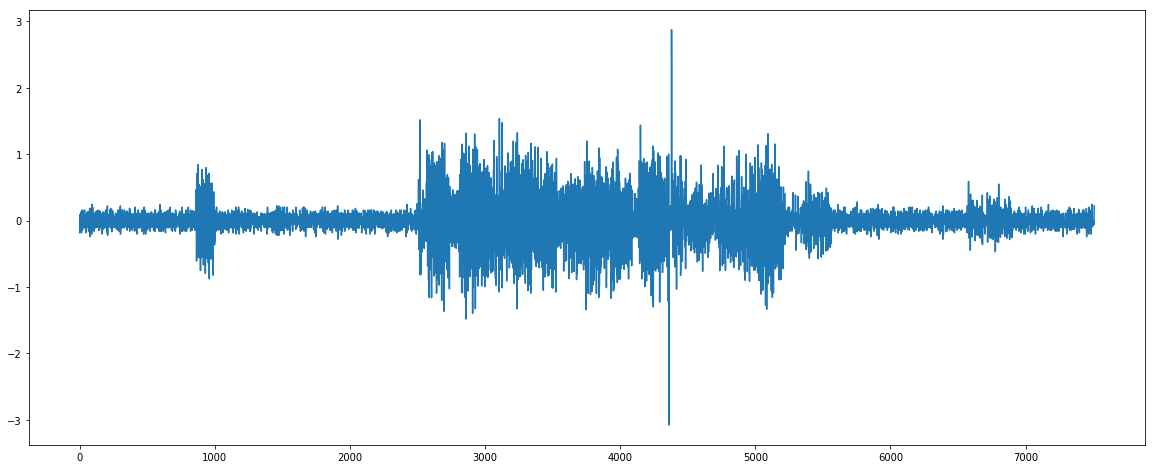

In [10]:
plot(np.gradient(np.log(wave_mean)))

# :)

In [11]:
np.min(np.gradient(np.log(wave_mean)))

-3.0788601181075714

In [12]:
np.argmin(np.gradient(np.log(wave_mean))) * 8

34888

In [13]:
np.max(np.gradient(np.log(wave_mean)))

2.875050224840122

In [14]:
np.argmax(np.gradient(np.log(wave_mean))) * 8

35040

In [15]:
wave_full2 = read_wave_file('nan-ai-file-2.wav')

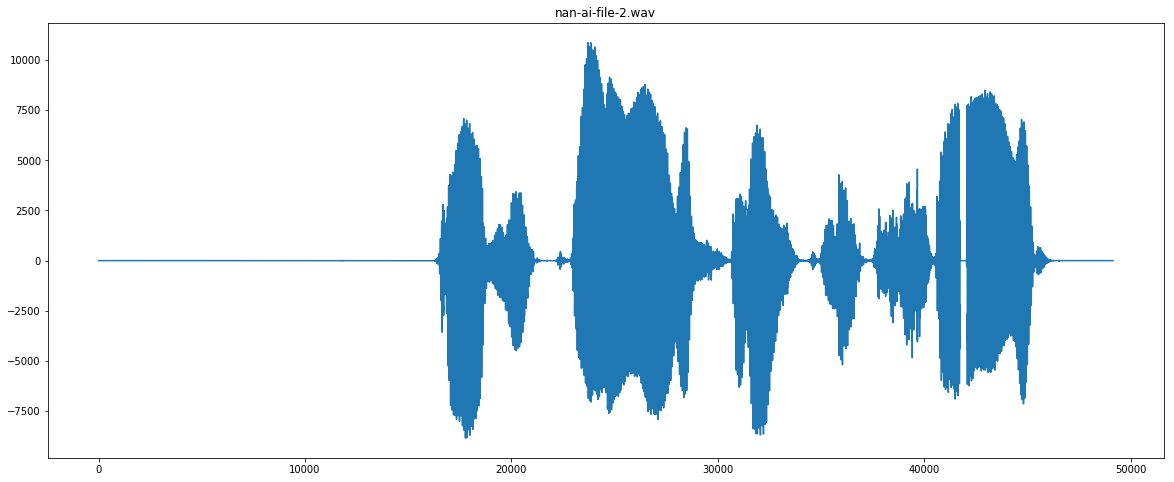

In [16]:
plot(wave_full2, 'nan-ai-file-2.wav', save_png=True)

In [17]:
wave_mean2 = mean_window(wave_full2)

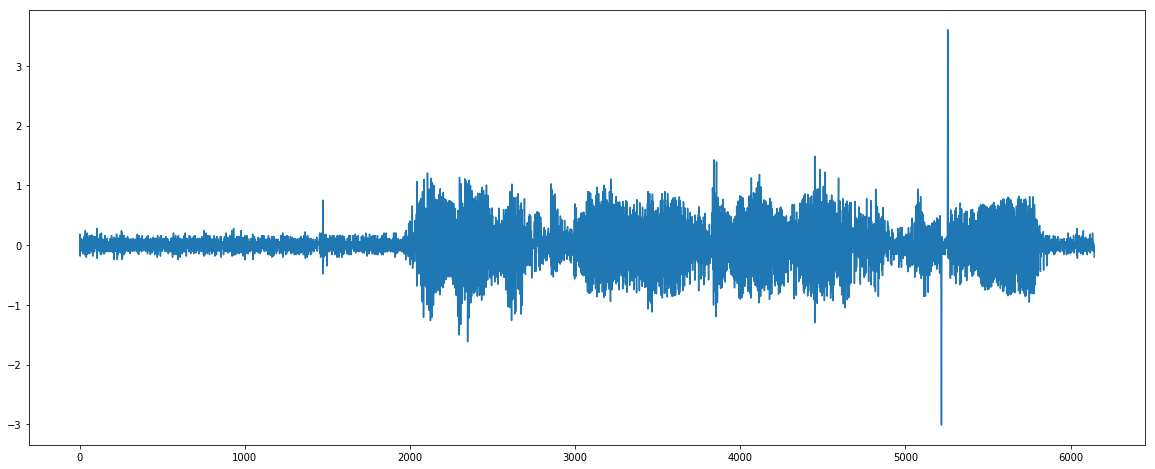

In [18]:
plot(np.gradient(np.log(wave_mean2)))

# :))

In [19]:
np.min(np.gradient(np.log(wave_mean2)))

-3.0125302482682486

In [20]:
np.argmin(np.gradient(np.log(wave_mean2))) * 8

41744

In [21]:
np.max(np.gradient(np.log(wave_mean2)))

3.606819175393891

In [22]:
np.argmax(np.gradient(np.log(wave_mean2))) * 8

42048

In [23]:
wave_full3 = read_wave_file('nan-ai-file-3.wav')

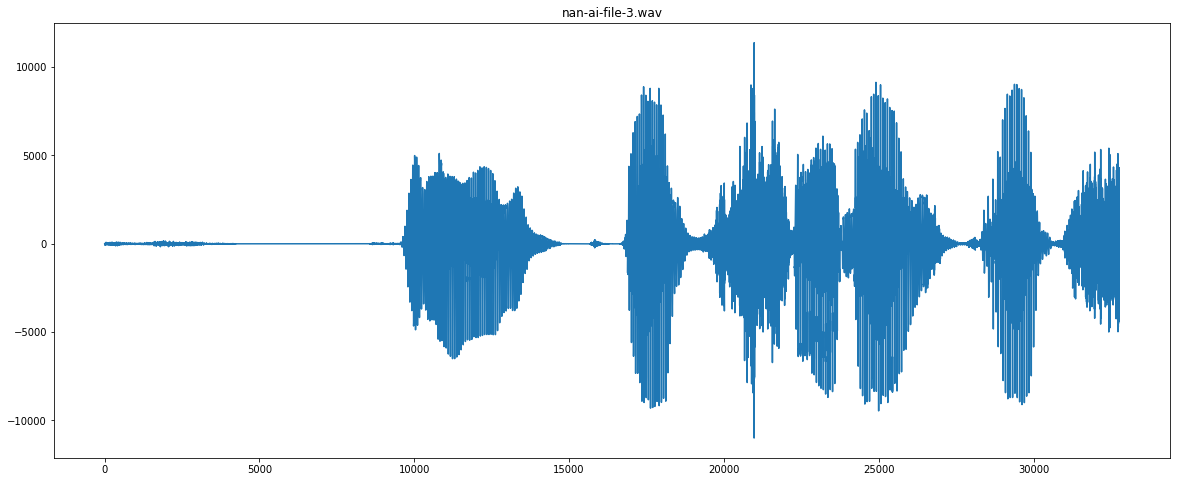

In [24]:
plot(wave_full3, 'nan-ai-file-3.wav', save_png=True)

In [25]:
wave_mean3 = mean_window(wave_full3)

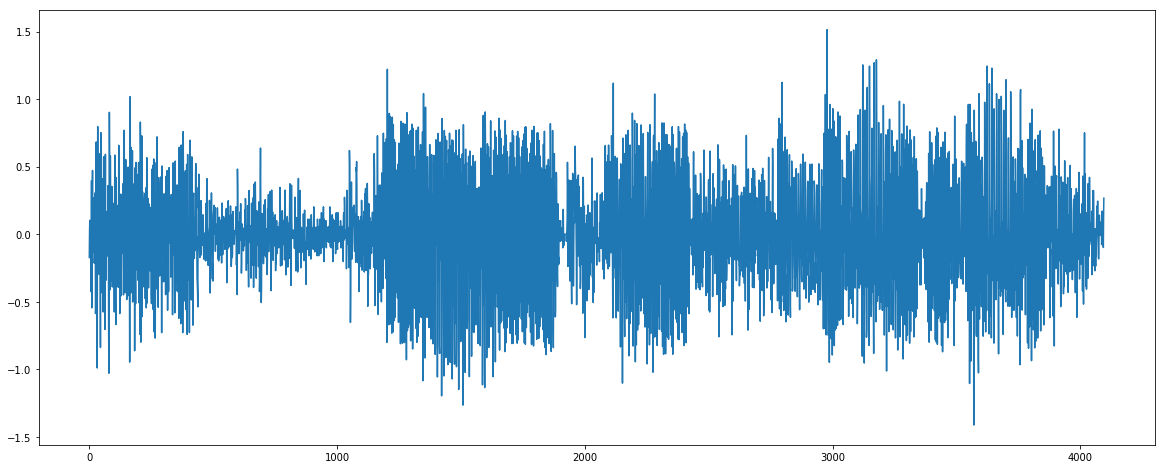

In [26]:
plot(np.gradient(np.log(wave_mean3)))

In [27]:
np.max(np.gradient(np.log(wave_mean3)))

1.5145038963160493

In [28]:
np.min(np.gradient(np.log(wave_mean3)))

-1.4127362557096386

# :)))

## Conclusion

For broken recordings gradient of log of averaged <i>(mean window)</i> absolute value of signal is about -3 at the beginning of signal drop and about +3 at the end. 

For files that are not broken these gradient values are about -1.5 and 1.5

In [29]:
def detect_broken_recording(file_name, min_treshold = -2.0, max_treshold = 2.0, window = 8):
    wave_full = read_wave_file(file_name)
    wave_mean = mean_window(wave_full)
    wave_log_gradient = np.gradient(np.log(wave_mean))
    min_gradient, max_gradient = np.min(wave_log_gradient), np.max(wave_log_gradient)
    if min_gradient < min_treshold and max_gradient > max_treshold:
        drop_begins, drop_ends = np.argmin(wave_log_gradient) * window, np.argmax(wave_log_gradient) * window
        print (file_name + ": invalid (fr. " + str(drop_begins) + "-" + str(drop_ends) + ")")
    else:
        print (file_name + ": valid")

In [30]:
detect_broken_recording('nan-ai-file-1.wav')

nan-ai-file-1.wav: invalid (fr. 34888-35040)


In [31]:
detect_broken_recording('nan-ai-file-2.wav')

nan-ai-file-2.wav: invalid (fr. 41744-42048)


In [32]:
detect_broken_recording('nan-ai-file-3.wav')

nan-ai-file-3.wav: valid
